In [45]:
fruit_list = ["apple", "banana", "orange"]
print(fruit_list[0])  # 첫 번째 아이템
print(fruit_list[-1])  # 마지막 아이템
print(fruit_list[1:3] )   # 범위 지정

apple
orange
['banana', 'orange']


In [1]:
import seaborn as sns
df = sns.load_dataset("tips")

# 기본 히트맵 생성

In [4]:
pivot_df = df.pivot_table("tip", "day", "size", observed=True)
pivot_df

size,1,2,3,4,5,6
day,,,,,,
Thur,1.83,2.442500,2.692500,4.218000,5.000000,5.3
Fri,1.92,2.644375,3.000000,4.730000,NaN,NaN
Sat,1.00,2.517547,3.797778,4.123846,3.000000,NaN
Sun,NaN,2.816923,3.120667,4.087778,4.046667,5.0


<Axes: xlabel='size', ylabel='day'>

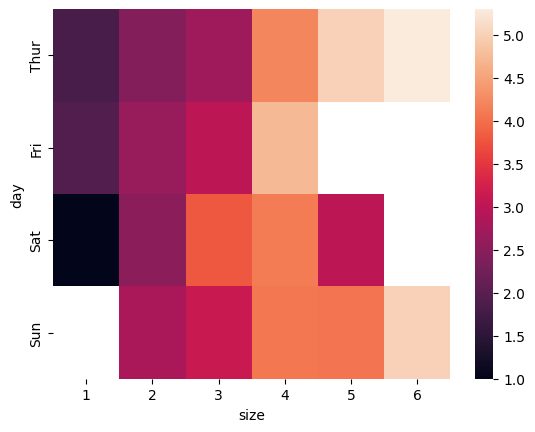

In [6]:
sns.heatmap(pivot_df)

# 히트맵 값 표시

<Axes: xlabel='size', ylabel='day'>

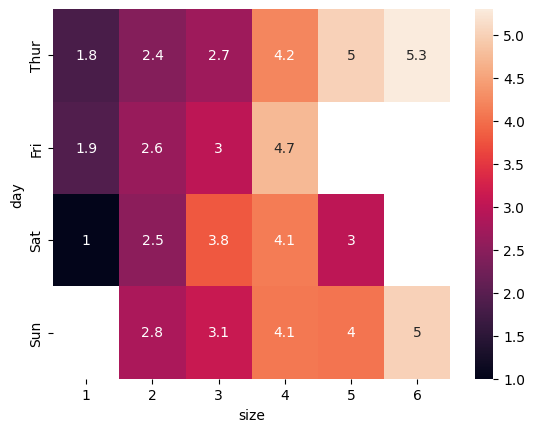

In [7]:
sns.heatmap(pivot_df, annot=True)

# 색상 팔레트 커스터마이징

<Axes: xlabel='size', ylabel='day'>

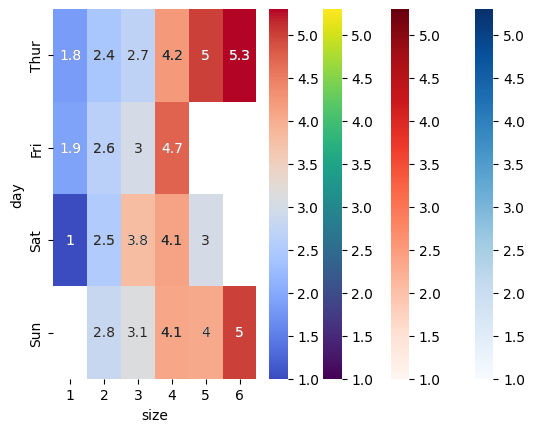

In [8]:
# 다양한 색상 팔레트
sns.heatmap(pivot_df, annot=True, cmap='Blues')
sns.heatmap(pivot_df, annot=True, cmap='Reds')
sns.heatmap(pivot_df, annot=True, cmap='viridis')
sns.heatmap(pivot_df, annot=True, cmap='coolwarm')

# 색상 범위 조정

<Axes: xlabel='size', ylabel='day'>

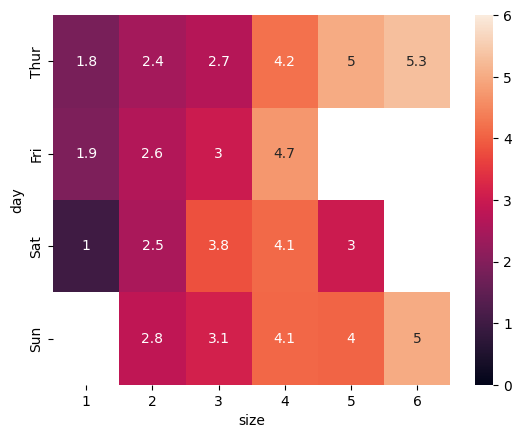

In [10]:
# 색상 범위 고정
sns.heatmap(pivot_df, annot=True, vmin=0, vmax=6)

<Axes: xlabel='size', ylabel='day'>

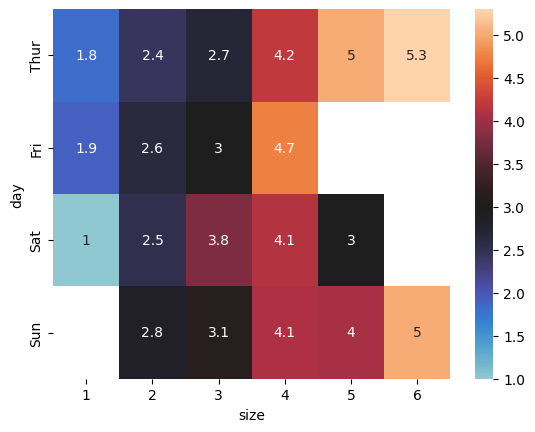

In [9]:
# 중심값 설정
sns.heatmap(pivot_df, annot=True, center=3)

# 색상바와 격자 설정

<Axes: xlabel='size', ylabel='day'>

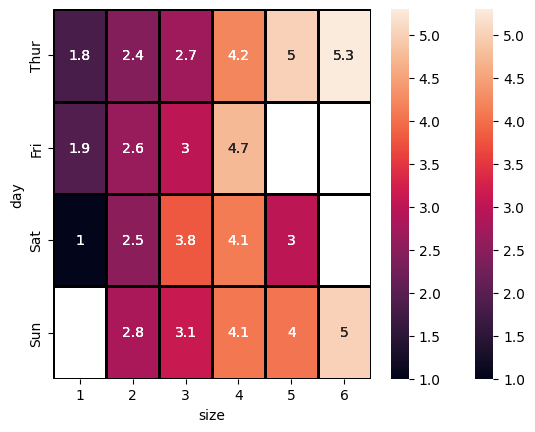

In [11]:
# 색상바 제거
sns.heatmap(pivot_df, annot=True, cbar=False)

# 격자선 추가
sns.heatmap(pivot_df, annot=True, linewidths=0.5, linecolor='white')

# 격자 색상 변경
sns.heatmap(pivot_df, annot=True, linewidths=1, linecolor='black')

# 상관관계 히트맵

<Axes: >

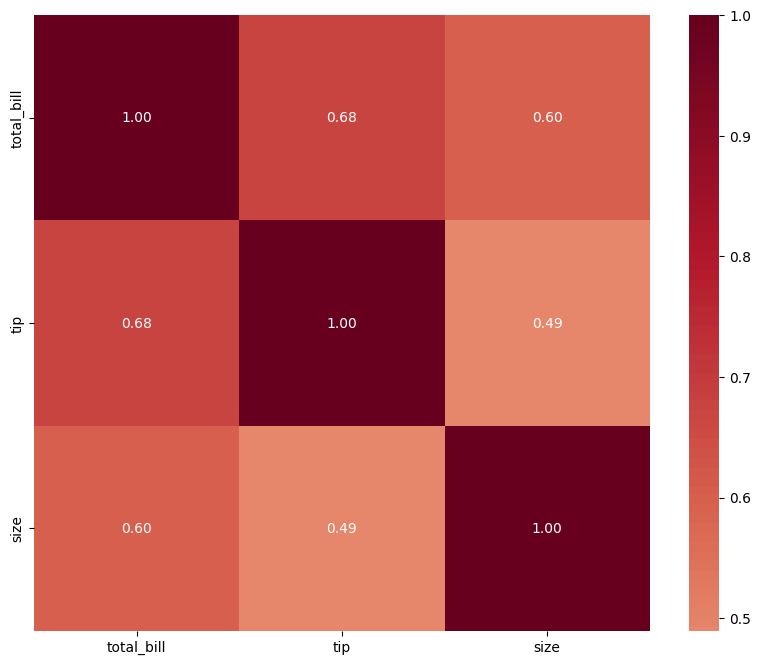

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# 숫자형 변수들의 상관관계
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# 상관관계 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True,           # 값 표시
            cmap='RdBu_r',       # 빨강-파랑 역순
            center=0,            # 0을 중심으로
            square=True,         # 정사각형 셀
            fmt='.2f')           # 소수점 2자리

<Axes: >

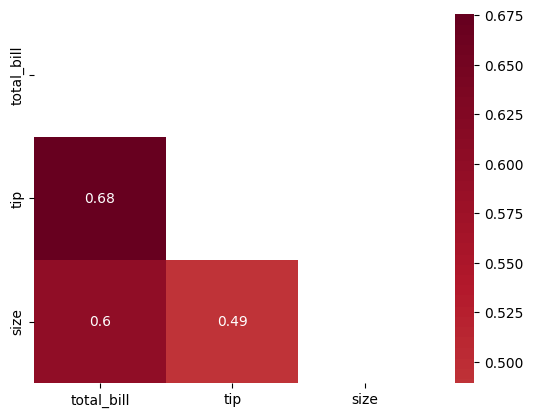

In [17]:
# 상삼각형만 표시 (중복 제거)
import numpy as np

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r',
            center=0)


C:\Users\zhini\AppData\Local\Temp\ipykernel_5856\1910251747.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  time_day_pivot = df.pivot_table('total_bill', 'day', 'time')


<Axes: xlabel='time', ylabel='day'>

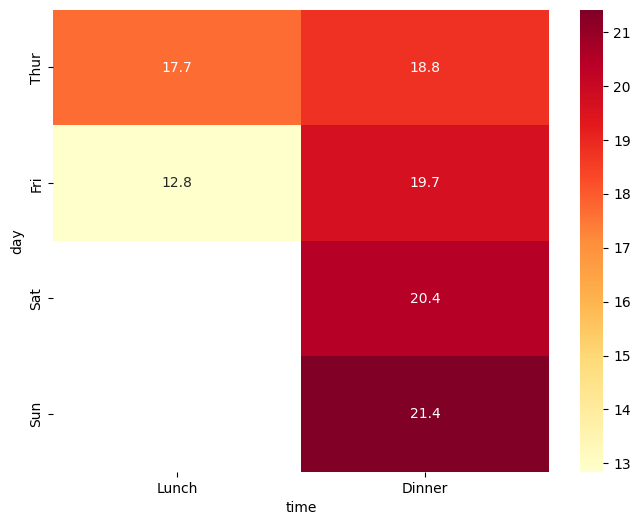

In [18]:
# 요일과 시간대별 평균 계산서
time_day_pivot = df.pivot_table('total_bill', 'day', 'time')

plt.figure(figsize=(8, 6))
sns.heatmap(time_day_pivot, 
            annot=True, 
            fmt='.1f',
            cmap='YlOrRd')

C:\Users\zhini\AppData\Local\Temp\ipykernel_5856\4105467481.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tip_pivot = df.pivot_table('tip', 'day', 'size')
C:\Users\zhini\AppData\Local\Temp\ipykernel_5856\4105467481.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  bill_pivot = df.pivot_table('total_bill', 'day', 'size')
C:\Users\zhini\miniconda3\envs\data_env\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\zhini\miniconda3\envs\data_env\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) De

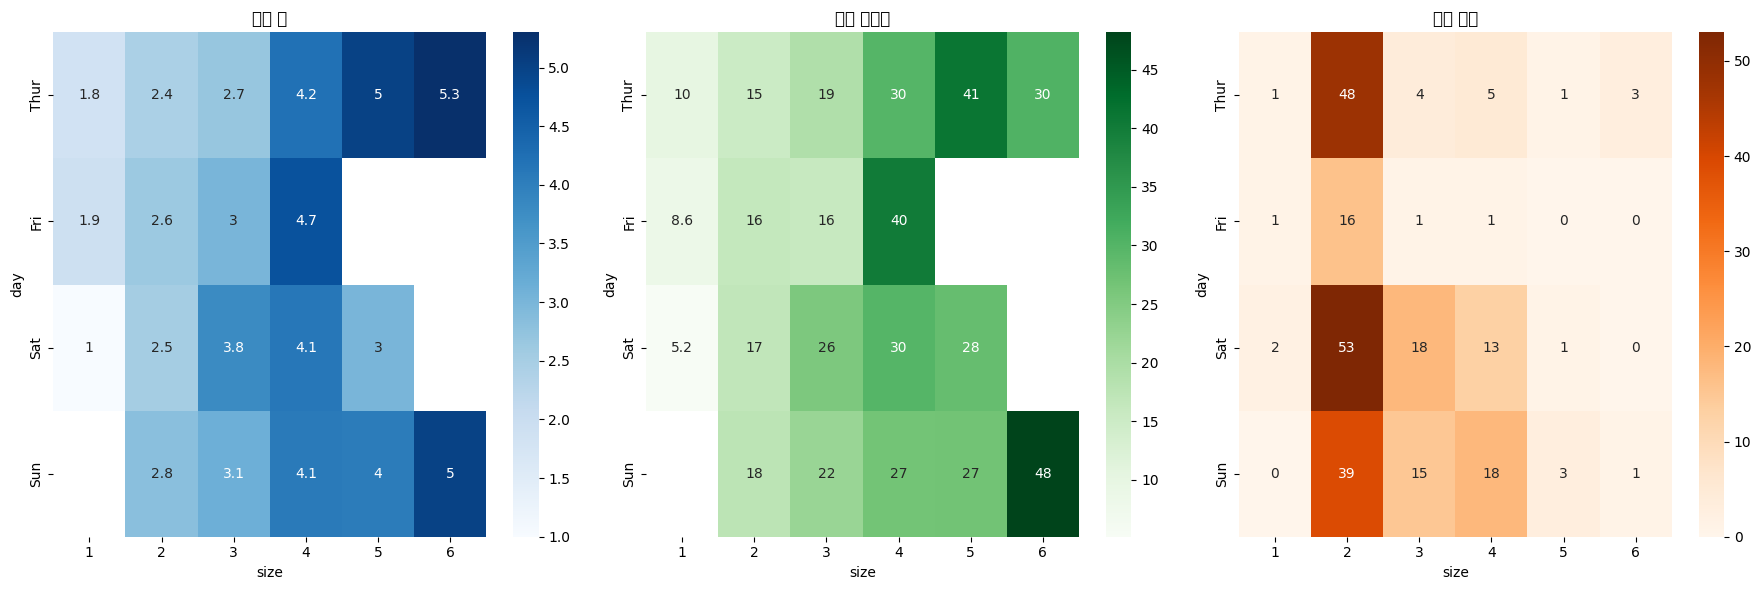

In [19]:
# 여러 지표를 동시에 표시
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 평균 팁
tip_pivot = df.pivot_table('tip', 'day', 'size')
sns.heatmap(tip_pivot, annot=True, ax=axes[0], cmap='Blues')
axes[0].set_title('평균 팁')

# 평균 계산서
bill_pivot = df.pivot_table('total_bill', 'day', 'size')
sns.heatmap(bill_pivot, annot=True, ax=axes[1], cmap='Greens')
axes[1].set_title('평균 계산서')

# 방문 횟수
count_pivot = df.pivot_table('tip', 'day', 'size', aggfunc='count')
sns.heatmap(count_pivot, annot=True, ax=axes[2], cmap='Oranges')
axes[2].set_title('방문 횟수')

plt.tight_layout()

C:\Users\zhini\AppData\Local\Temp\ipykernel_5856\3144390948.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_ordered = df.pivot_table('tip', 'day', 'size')


<Axes: xlabel='size', ylabel='day'>

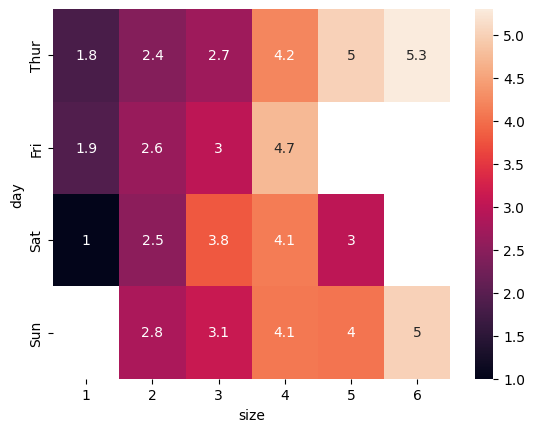

In [20]:
# 카테고리 순서 지정
day_order = ['Thur', 'Fri', 'Sat', 'Sun']
size_order = [1, 2, 3, 4, 5, 6]

# 순서가 지정된 피봇 테이블
pivot_ordered = df.pivot_table('tip', 'day', 'size')
pivot_ordered = pivot_ordered.reindex(day_order)
pivot_ordered = pivot_ordered.reindex(columns=size_order)

sns.heatmap(pivot_ordered, annot=True)